<a href="https://colab.research.google.com/github/wemimofolayan/SCAMP-assessment/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pycaret

In [23]:
# Pandas library in python to read the csv file.
import pandas as pd
 
# for numerical computaions use numpy library
import numpy as np
 
# data visualization
import missingno as msno
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
 
# Algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
 
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

##  Load the Data

In [24]:
# Create a pandas dataframe and assign it to variable.
titanic = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test1.csv')

## Data Analysis

In [25]:
# Print first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# Print Last 5 rows of the dataframe.
titanic_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [27]:
# gives shape of datase in (rows,columns)
titanic.shape

(891, 12)

In [28]:
# Describe gives us statistical information about numerical columns in the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
# unique values or range for feature set
print('Genders:', titanic['Sex'].unique())
print('Embarked:', titanic['Embarked'].unique())
print('Pclass:', titanic['Pclass'].unique())
print('Survived:', titanic['Survived'].unique())
print('SibSp Range:', titanic['SibSp'].min(),'-',titanic['SibSp'].max())
print('Parch Range:', titanic['Parch'].min(),'-',titanic['Parch'].max())
print('Family size range:', (titanic['Parch']+titanic['SibSp']).min(),'-',(titanic['Parch']+titanic['SibSp']).max())
print('Fare Range:', titanic['Fare'].min(),'-',titanic['Fare'].max())

Genders: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]
Pclass: [3 1 2]
Survived: [0 1]
SibSp Range: 0 - 8
Parch Range: 0 - 6
Family size range: 0 - 10
Fare Range: 0.0 - 512.3292


In [30]:
# info method provides information about dataset like 
# total values in each column, null/not null, datatype, memory occupied etc
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


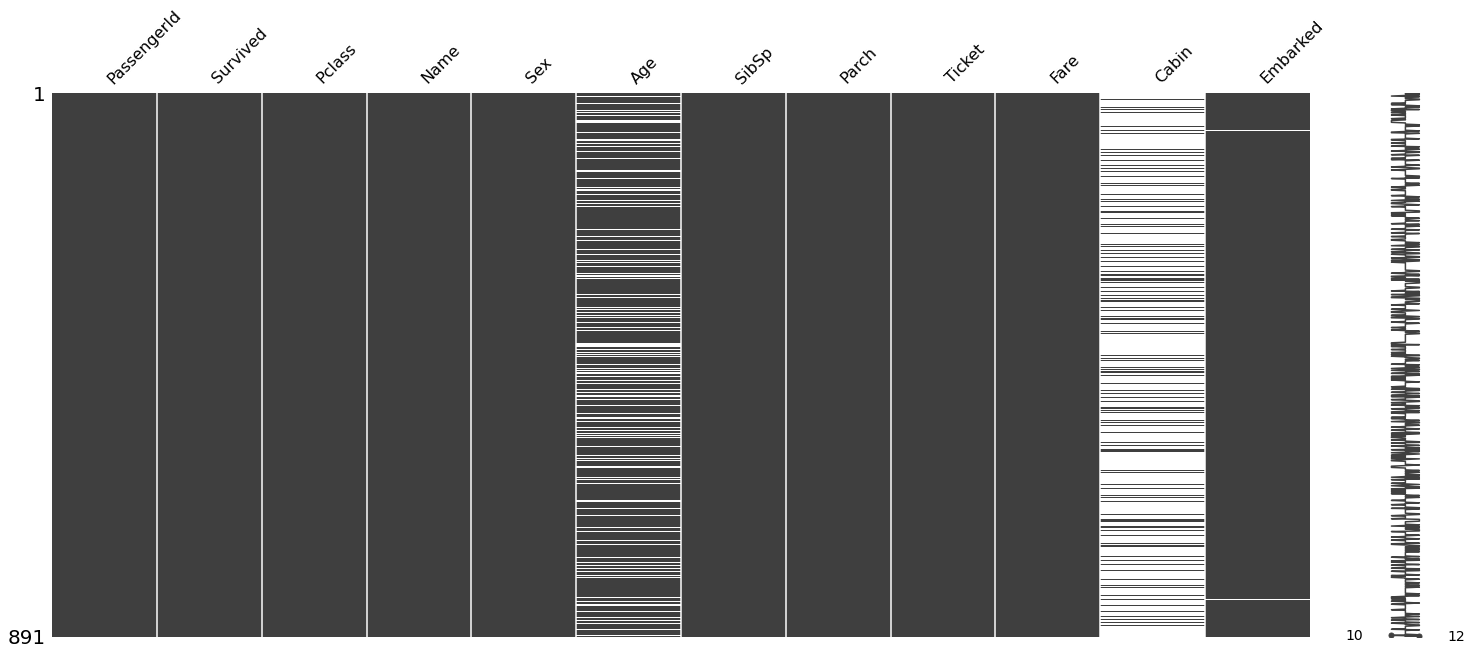

In [31]:
msno.matrix(titanic)

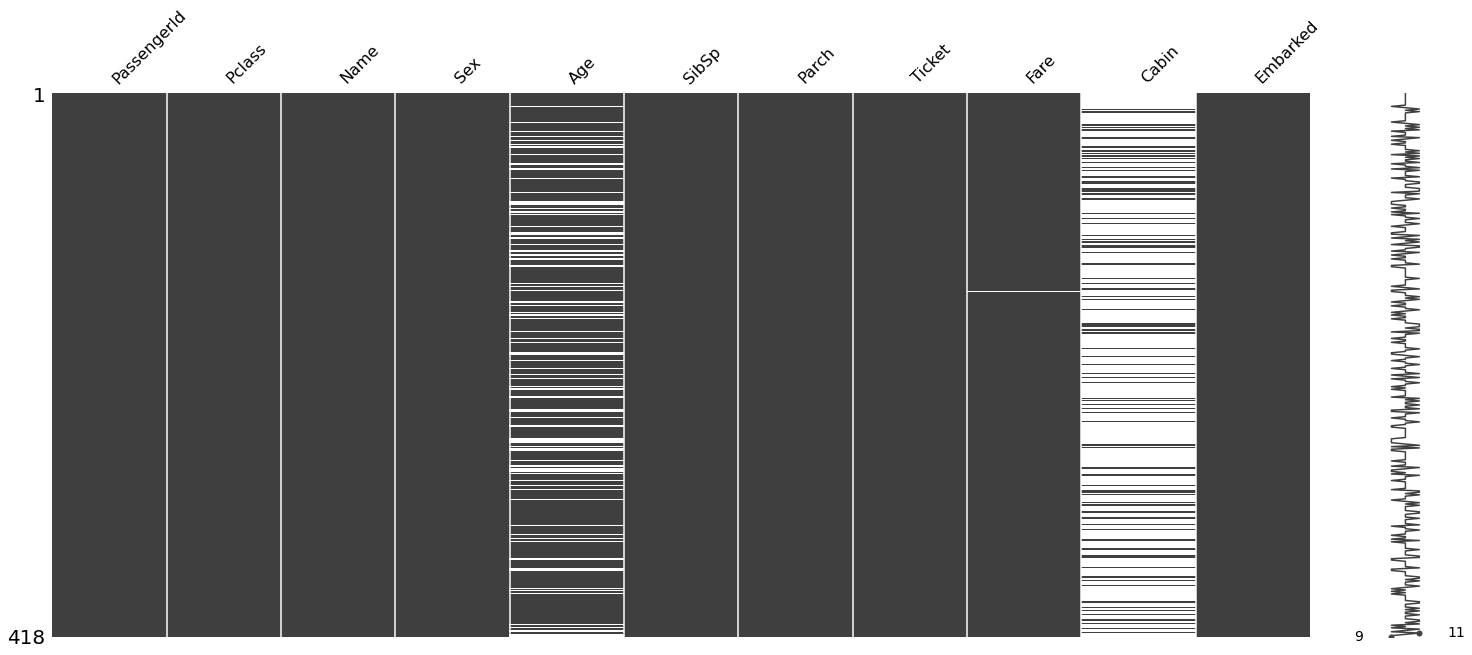

In [32]:
msno.matrix(titanic_test)

In [33]:
# Let's write a function to print the total percentage of the missing values.
# (This can be a good excercise for beginers to try to write sample function like this)
 
# This function takes a Dataframe (df) as input and returns two columns,total missing values and total missing alues percentage
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) * 100 /len(df),2)
    return pd.concat([total,percent], axis = 1 ,keys = ['total','percent'])

In [34]:
missing_data(titanic)

,total,percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [35]:
# check missing values in test dataset
missing_data(titanic_test)

,total,percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [36]:
# COMPLETING: complete or delete missing values in train and test dataset
dataset = [titanic,titanic_test]
 
for data in dataset:
    # coplete missing age with median
    data['Age'].fillna(data['Age'].median(),inplace = True)
    
    # complete Embarked with mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
    
    # complete missing Fare with median
    data['Fare'].fillna(data['Fare'].median(),inplace = True)

In [37]:
missing_data(titanic)

,total,percent
Cabin,687,77.1
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [38]:
titanic.drop(['Cabin'], axis=1, inplace = True)
titanic_test.drop(['Cabin'],axis=1,inplace=True)

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [40]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [41]:
missing_data(titanic)

,total,percent
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0
Survived,0,0.0


In [42]:
net_Survived=titanic['Survived'].value_counts().to_frame().reset_index().rename(columns={'index':'Survived','Survived':'count'})

In [43]:
fig = go.Figure([go.Pie(labels=net_Survived['Survived'], values=net_Survived['count'])])
 
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
 
fig.update_layout(title="Travellers survived on titanic",title_x=0.5)
fig.show()

ValueError: ignored

In [44]:
age_analysis=titanic[titanic['Survived']==1]['Sex'].value_counts().reset_index().rename(columns={'index':'Sex','Sex':'count'})

In [46]:
fig = go.Figure(go.Bar(x=age_analysis['Sex'],y=age_analysis['count']))
fig.update_layout(autosize=False,width=400,height=500,title_text='Analysis of Survived travellers by gender',xaxis_title="sex",yaxis_title="count",paper_bgcolor="lightsteelblue")
fig.show()

In [47]:
def draw(graph):
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 5,height ,ha= "center")

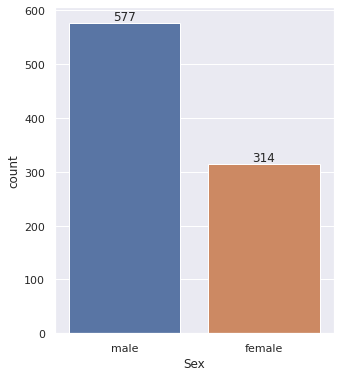

In [48]:
sns.set(style="darkgrid")
plt.figure(figsize = (5, 6))
x = sns.countplot(titanic['Sex'])
draw(x)

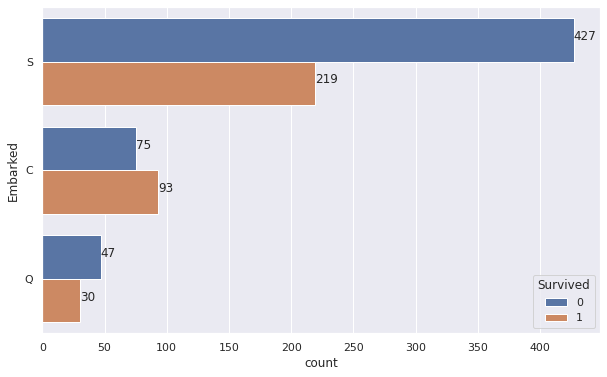

In [49]:
plt.figure(figsize = (10, 6))
graph  = sns.countplot(y = "Embarked", hue ="Survived", data = titanic)
for p in graph.patches:
        Total = '{:,.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        graph.annotate(Total, (x, y))

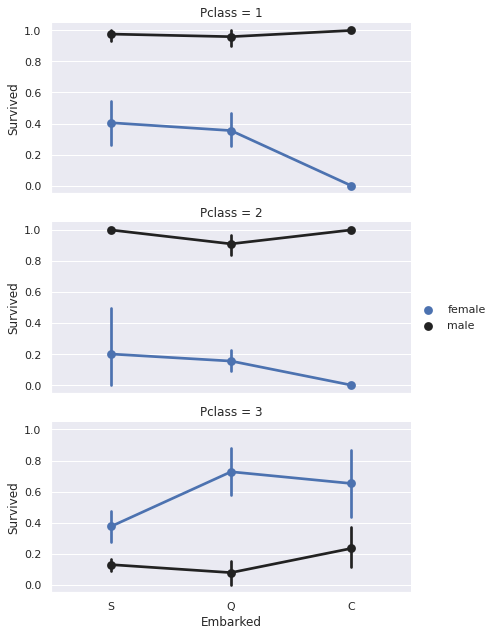

In [50]:
FGrid = sns.FacetGrid(titanic, row='Pclass', aspect=2)
FGrid.map(sns.pointplot, 'Embarked', 'Survived', 'Sex', palette=None,  order=None, hue_order=None)
FGrid.add_legend()

In [51]:
titanic.drop(['Embarked'], axis=1, inplace = True)
titanic_test.drop(['Embarked'],axis=1,inplace=True)

In [52]:
titanic=titanic.dropna()
titanic['age_category']=np.where((titanic['Age']<19),"below 19",
                                 np.where((titanic['Age']>18)&(titanic['Age']<=30),"19-30",
                                    np.where((titanic['Age']>30)&(titanic['Age']<=50),"31-50",
                                                np.where(titanic['Age']>50,"Above 50","NULL"))))
age=titanic['age_category'].value_counts().to_frame().reset_index().rename(columns={'index':'age_category','age_category':'Count'})

In [53]:
titanic_age=titanic['age_category'].value_counts().to_frame().reset_index().rename(columns={'index':'age_category','age_category':'count'})

In [55]:
colors=['pink','teal','orange','green']
fig = go.Figure([go.Pie(labels=titanic_age['age_category'], values=titanic_age['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+label', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Titanic Age Categories",title_x=0.5)
fig.show()

In [56]:
titanic['survived_or_not']=np.where(titanic['Survived']==1,"Survived",np.where(titanic['Survived']==0,"Died","null")) # .head(2)'
 
sun_df=titanic[['Sex','survived_or_not','age_category','Fare']].groupby(['Sex','survived_or_not','age_category']).agg('sum').reset_index()

In [57]:
fig = px.sunburst(sun_df, path=['Sex','survived_or_not','age_category'], values='Fare')
fig.update_layout(title="Titanic dataset distribution by Drilldown (Sex, Survived, Age Categories)",title_x=0.5)
fig.show()

TypeError: ignored

In [58]:
sur_age=titanic[titanic['Survived']==1]['Age']
un_age=titanic[titanic['Survived']==0]['Age']

In [59]:
fig = go.Figure(go.Box(y=sur_age,name="Age")) 
fig.update_layout(title="Distribution of Age by Survived travellers", autosize=False, width=600, height=700)
fig.show()

In [60]:
fig = go.Figure(go.Box(y=un_age,name="Age")) 
fig.update_layout(title="Distribution of Age By Unsurvived tarvellers", autosize=False, width=600, height=700)
fig.show()

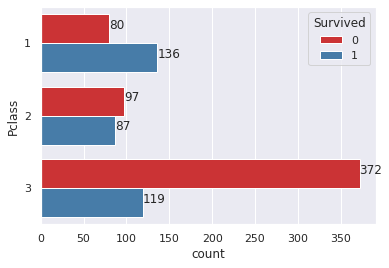

In [61]:
ax = sns.countplot(y="Pclass", hue="Survived", data=titanic, palette="Set1")
for p in ax.patches:
        Total = '{:,.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(Total, (x, y))

In [62]:
# combine test and train as single to apply some function, we will use it again in Data Preprocessing
all_data=[titanic,titanic_test]
 
for dataset in all_data:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1

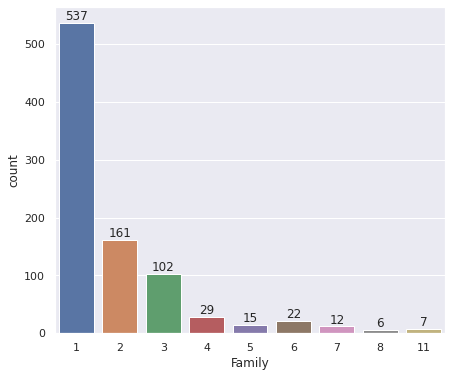

In [63]:
sns.set(style="darkgrid")
plt.figure(figsize = (7, 6))
x = sns.countplot(titanic['Family'])
draw(x)

In [64]:
surfamily_size = titanic[titanic['Survived'] == 1]

In [65]:
fig = go.Figure(data=go.Violin(y=surfamily_size['Family'],
                               marker_color="blue",
                               x0='Family size'))
 
fig.update_layout(title="Survived travellers family size")
fig.show()

In [66]:
unfamily_size = titanic[titanic['Survived'] == 0]

In [67]:
fig = go.Figure(data=go.Violin(y=unfamily_size['Family'],
                               marker_color="blue",
                               x0='Family size'))
 
fig.update_layout(title="Unsurvived travellers family size")
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



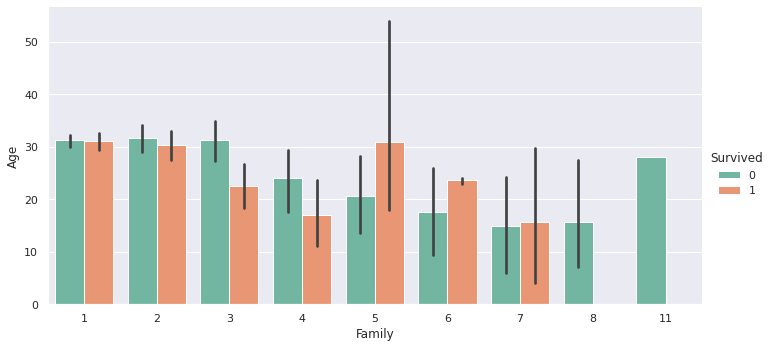

In [68]:
axes = sns.factorplot('Family','Age','Survived',
                      data=titanic, aspect = 2,kind='bar', orient='v',palette="Set2")

In [69]:
# create bin for age features. 
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

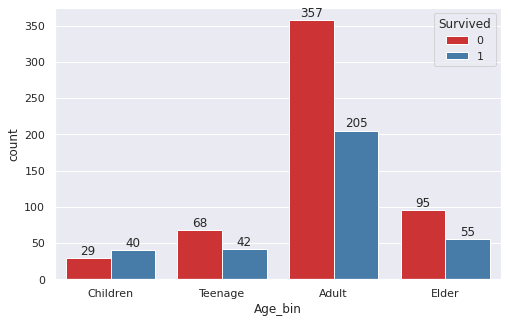

In [70]:
plt.figure(figsize = (8, 5))
bin = sns.countplot(x='Age_bin', hue='Survived', data=titanic,palette="Set1")
draw(bin)

In [71]:
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,10,50,100,550], labels=['Low_fare','medium_fare','Average_fare','high_fare'])

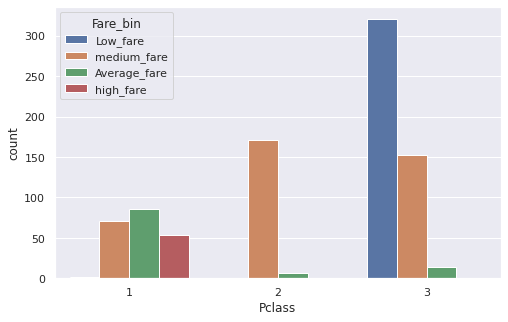

In [73]:
plt.figure(figsize = (8, 5))
sns.countplot(x='Pclass', hue='Fare_bin', data=titanic)

In [74]:
pd.DataFrame(abs(titanic.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.064910
SibSp,0.035322
Family,0.016639
PassengerId,0.005007


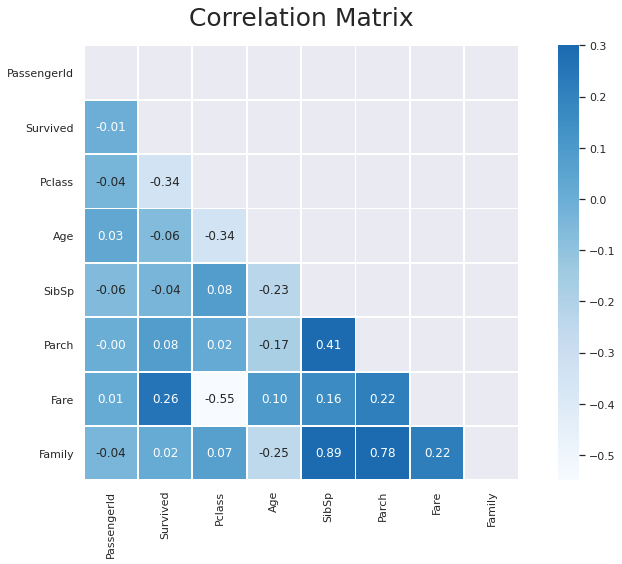

In [75]:
# Generate a mask for the upper triangle (taken from seaborn example gallery)
corr=titanic.corr()  #['Survived']
 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (14,8))
sns.heatmap(corr, 
            annot=True,
            mask = mask,
            cmap = 'Blues',
            linewidths=.9, 
            linecolor='white',
            vmax = 0.3,
            fmt='.2f',
            center = 0,
            square=True)
plt.yticks(rotation = 0)
plt.title("Correlation Matrix", y = 1,fontsize = 25, pad = 20);

In [76]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  age_category     891 non-null    object  
 11  survived_or_not  891 non-null    object  
 12  Family           891 non-null    int64   
 13  Age_bin          891 non-null    category
 14  Fare_bin         876 non-null    category
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 139.6+ KB


In [77]:
drop_col= ["survived_or_not","age_category"]
titanic.drop(drop_col,axis=1,inplace=True)

In [78]:
# Convert ‘Sex’ feature into numeric.
genders = {"male": 0, "female": 1}
 
for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map(genders)
titanic['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [79]:
for dataset in all_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 26), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 28), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 35), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 45), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 6
titanic['Age'].value_counts()

3    222
2    139
4    133
5    116
6    101
1     97
0     83
Name: Age, dtype: int64

In [80]:
sub = pd.read_csv('gender_submission.csv')

In [81]:
for dataset in all_data:
    drop_column = ['Age_bin','Fare','Name','Ticket', 'PassengerId','SibSp','Parch','Fare_bin']
    dataset.drop(drop_column, axis=1, inplace = True)

In [83]:
from pycaret.classification import *

In [84]:
exp_reg = setup(titanic, target = "Survived")

Setup Succesfully Completed!


,Description,Value
0,session_id,6316
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 5)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [85]:
 compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.8217,0.8406,0.6857,0.8374,0.7453,0.6110,0.6255,0.2480
1,CatBoost Classifier,0.8200,0.8622,0.6984,0.8225,0.7470,0.6096,0.6218,0.6654
2,Random Forest Classifier,0.8168,0.8531,0.6982,0.8079,0.7410,0.6017,0.6124,0.1118
3,Light Gradient Boosting Machine,0.8168,0.8568,0.6944,0.8068,0.7431,0.6024,0.6092,0.0332
4,Gradient Boosting Classifier,0.8167,0.8688,0.7111,0.8003,0.7483,0.6054,0.6123,0.0885
5,Decision Tree Classifier,0.8152,0.8330,0.6817,0.8234,0.7382,0.5980,0.6110,0.0055
6,Ridge Classifier,0.8137,0.0000,0.7152,0.7925,0.7470,0.6005,0.6070,0.0073
7,Linear Discriminant Analysis,0.8121,0.8563,0.7111,0.7923,0.7443,0.5968,0.6037,0.0082
8,Extreme Gradient Boosting,0.8088,0.8640,0.6730,0.8058,0.7276,0.5828,0.5931,0.0533
9,Logistic Regression,0.8056,0.8570,0.7152,0.7798,0.7399,0.5856,0.5929,0.0193


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6316, verbose=0,
                     warm_start=False)

In [86]:
 model = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8232,0.7917,0.7917,0.7917,0.6635,0.6635
1,0.7937,0.8841,0.5833,0.8235,0.6829,0.5365,0.5540
2,0.9524,0.9466,0.8750,1.0000,0.9333,0.8966,0.9014
3,0.7742,0.8356,0.6087,0.7368,0.6667,0.4983,0.5035
4,0.7903,0.8580,0.6667,0.7619,0.7111,0.5477,0.5507
5,0.8065,0.8712,0.5417,0.9286,0.6842,0.5582,0.6004
6,0.7581,0.8854,0.8333,0.6452,0.7273,0.5161,0.5298
7,0.8387,0.8416,0.6250,0.9375,0.7500,0.6379,0.6664
8,0.8387,0.8591,0.7083,0.8500,0.7727,0.6493,0.6558
9,0.8065,0.8174,0.7500,0.7500,0.7500,0.5921,0.5921


In [87]:
 tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.8296,0.7917,0.7600,0.7755,0.6328,0.6331
1,0.7778,0.8830,0.5833,0.7778,0.6667,0.5051,0.5168
2,0.9206,0.9509,0.8750,0.9130,0.8936,0.8304,0.8308
3,0.7742,0.8389,0.6087,0.7368,0.6667,0.4983,0.5035
4,0.7742,0.8251,0.6667,0.7273,0.6957,0.5167,0.5179
5,0.8065,0.8613,0.6667,0.8000,0.7273,0.5792,0.5850
6,0.7581,0.8448,0.8750,0.6364,0.7368,0.5231,0.5459
7,0.7903,0.8350,0.6250,0.7895,0.6977,0.5405,0.5491
8,0.8387,0.8196,0.7083,0.8500,0.7727,0.6493,0.6558
9,0.7903,0.8152,0.7500,0.7200,0.7347,0.5615,0.5618


In [88]:
 predictions = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.791,0.8102,0.6117,0.7975,0.6923,0.5382,0.5491


In [90]:
 
predictions = predict_model(tuned_model, data = titanic_test)
sub["Survived"] = predictions['Label']
sub.to_csv('lat_prediction.csv',index= False)
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
